In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('house_rental.txt',sep=",",index_col = 'Unnamed: 0')
df.head(5)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [8]:
df.shape

(645, 7)

In [9]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [13]:
df['Floor'].value_counts()

2     103
5      88
4      75
6      75
3      69
7      42
8      36
10     34
9      26
1      22
11     19
13     14
12     13
19      7
14      6
15      4
21      4
18      3
16      2
17      2
22      1
Name: Floor, dtype: int64

In [14]:
df['TotalFloor'].value_counts()

7     161
12    113
14     68
4      36
6      36
9      30
5      30
13     30
15     28
21     18
19     17
11     16
16     13
25     10
17      8
18      8
10      8
24      4
8       3
20      2
27      2
3       1
38      1
26      1
1       1
Name: TotalFloor, dtype: int64

In [15]:
df['Bathroom'].value_counts()

2    386
1    198
3     46
4     10
5      4
0      1
Name: Bathroom, dtype: int64

In [16]:
df['Living.Room'].value_counts()

2    509
1    118
3     10
0      7
4      1
Name: Living.Room, dtype: int64

In [17]:
df['Bedroom'].value_counts()

3    239
2    161
4    161
1     69
5     13
6      1
7      1
Name: Bedroom, dtype: int64

In [18]:
df.corr()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


In [19]:
pd.isnull(df).any()

Sqft           False
Floor          False
TotalFloor     False
Bedroom        False
Living.Room    False
Bathroom       False
Price          False
dtype: bool

<AxesSubplot:>

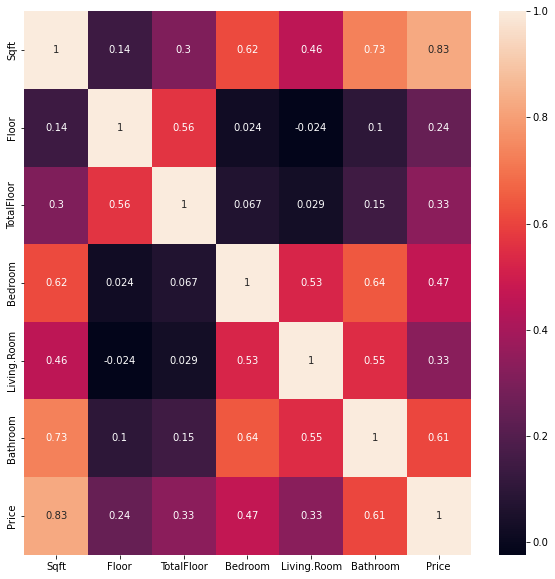

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

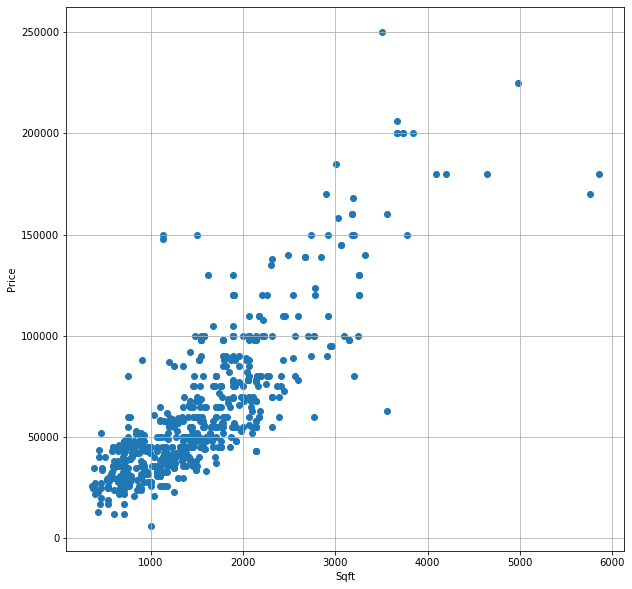

In [22]:
plt.figure(figsize = (10,10))
plt.scatter(df['Sqft'], df['Price'])
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.grid()
plt.show()

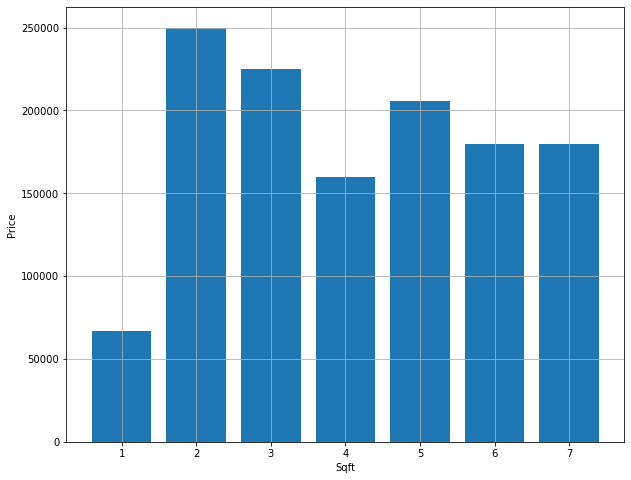

In [23]:
plt.figure(figsize = (10,8))
plt.bar(df['Bedroom'], df['Price'])
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.grid()
plt.show()

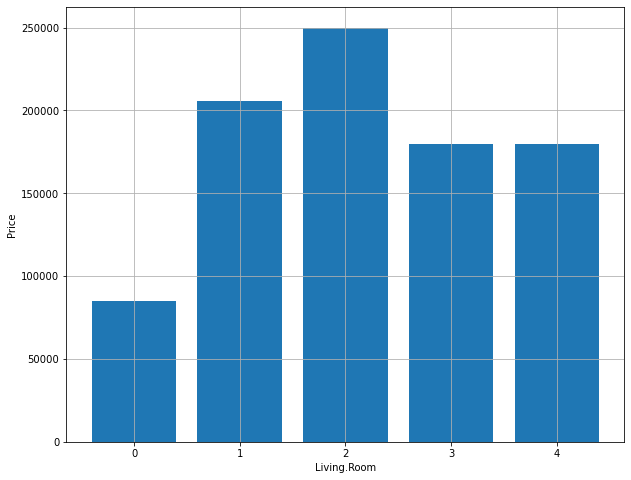

In [24]:
plt.figure(figsize = (10,8))
plt.bar(df['Living.Room'], df['Price'])
plt.xlabel('Living.Room')
plt.ylabel('Price')
plt.grid()
plt.show()

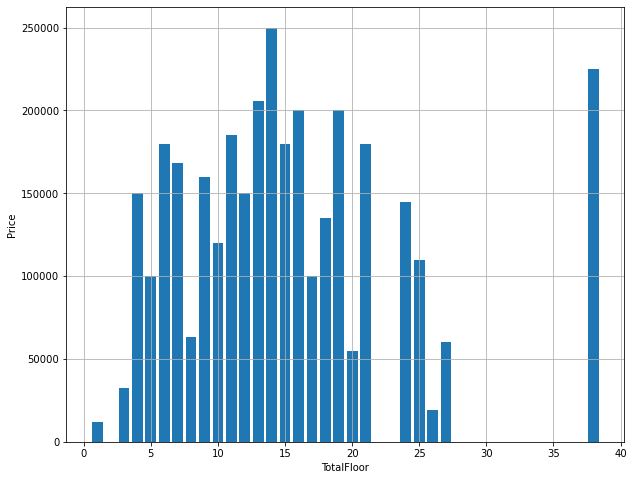

In [25]:
plt.figure(figsize = (10,8))
plt.bar(df['TotalFloor'], df['Price'])
plt.xlabel('TotalFloor')
plt.ylabel('Price')
plt.grid()
plt.show()

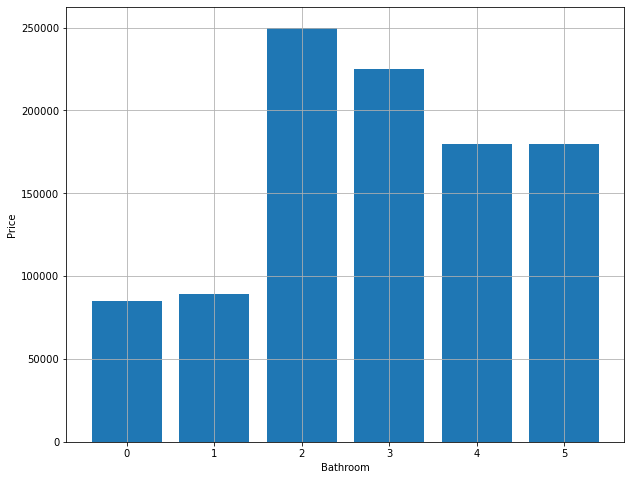

In [26]:
plt.figure(figsize = (10,8))
plt.bar(df['Bathroom'], df['Price'])
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.grid()
plt.show()

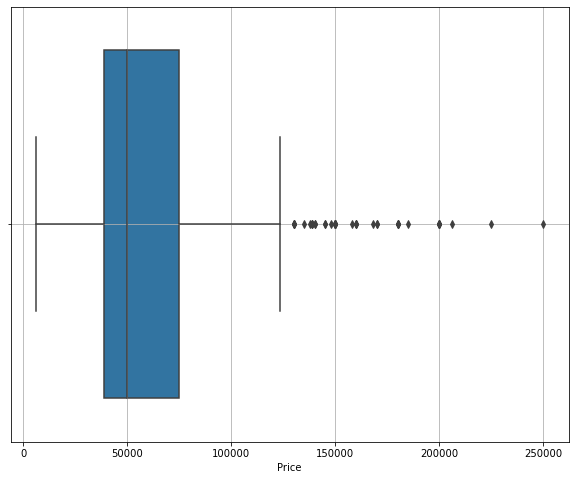

In [27]:
plt.figure(figsize = (10,8))
sns.boxplot(x = df['Price'])
plt.grid()

In [28]:
minimum = df['Price'].quantile(.20)
maximum = df['Price'].quantile(.80)

print(minimum, maximum)

36000.0 80400.00000000009


In [32]:
df1 = df[(df['Price'] < maximum) & (df['Price']>minimum)]
df1.shape

(377, 7)

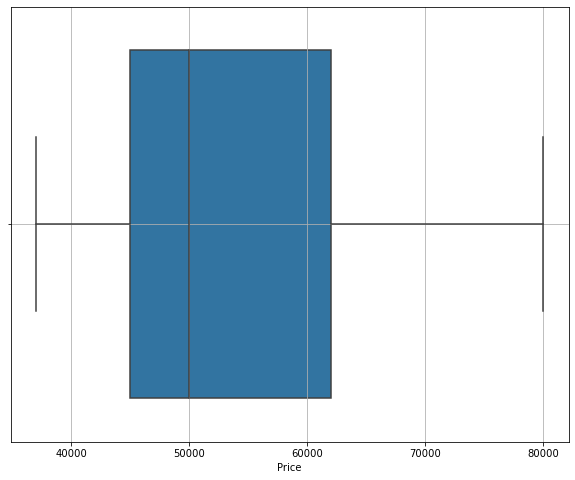

In [33]:
plt.figure(figsize = (10,8))
sns.boxplot(x = df2['Price'])
plt.grid()

In [34]:
df1.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [35]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = 0)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,KFold
x_axis = []
y_axis = []

for i in range(1,26,2):
    reg = KNeighborsRegressor(n_neighbors= i)
    score = cross_val_score(reg, x_train, y_train,cv = KFold(n_splits = 5))
    x_axis.append(i)
    y_axis.append(score.mean())

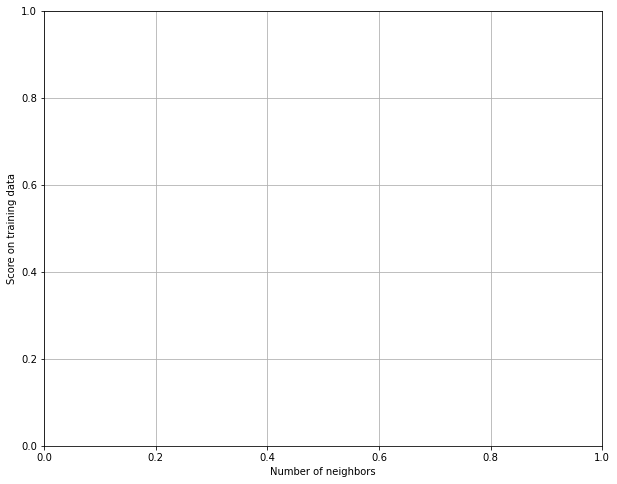

In [40]:
plt.figure(figsize = (10,8))
plt.xlabel('Number of neighbors')
plt.ylabel('Score on training data')
plt.grid()
plt.show()

In [44]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors = 5)
reg.fit(x_train, y_train)

KNeighborsRegressor()

In [45]:
y_pred = reg.predict(x_test)

In [46]:
score_test = reg.score(x_test, y_test)
score_test


0.6764966779699395